In [23]:
import pandas as pd

In [24]:
from matplotlib import pyplot as plt

In [25]:
data = pd.read_csv('Vital_Statistics_Deaths_by_Region_and_Age-Group_by_Selected_Cause_of_Death___Beginning_2003.csv')

In [26]:
data.dtypes

Year                        int64
Sex                        object
Age Group                  object
Race or Ethnicity          object
Selected Cause of Death    object
Deaths                      int64
dtype: object

In [27]:
data

,Year,Sex,Age Group,Race or Ethnicity,Selected Cause of Death,Deaths
0,2016,M,85+,Black Non Hispanic,Accidents,18
1,2016,M,45-54,Hispanic,Cerebrovascular Disease,31
2,2016,M,25-34,Other Non Hispanic,Pneumonia,1
3,2016,F,9-Jan,Black Non Hispanic,Malignant Neoplasms,5
4,2016,M,65-74,Black Non Hispanic,Diseases of the Heart,709
5,2016,M,55-64,White Non Hispanic,Diabetes Mellitus,43
6,2016,M,55-64,Other Non Hispanic,Diabetes Mellitus,7
7,2016,F,25-34,Not Stated,All Other Causes,10
8,2016,M,65-74,Black Non Hispanic,Pneumonia,87
9,2016,M,65-74,Hispanic,Total,1399


In [28]:
data['Age Group'].unique()

array(['85+', '45-54', '25-34', '9-Jan', '65-74', '55-64', '20-24',
       '19-Oct', '<1', '35-44', '75-84'], dtype=object)

In [29]:
data['Race or Ethnicity'].unique()

array(['Black Non Hispanic', 'Hispanic', 'Other Non Hispanic',
       'White Non Hispanic', 'Not Stated'], dtype=object)

In [30]:
data['Selected Cause of Death'].unique()

array(['Accidents', 'Cerebrovascular Disease', 'Pneumonia',
       'Malignant Neoplasms', 'Diseases of the Heart',
       'Diabetes Mellitus', 'All Other Causes', 'Total', 'CLRD', 'AIDS'],
      dtype=object)

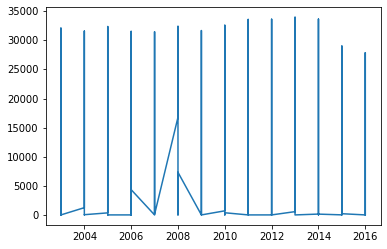

In [31]:
plt.plot(data.Year, data.Deaths)
plt.show()

In [32]:
#creates a new dataframe that isolates 2016 data
twentysixteen = data[data.Year == 2016]

In [33]:
#prints the dataframe
twentysixteen

,Year,Sex,Age Group,Race or Ethnicity,Selected Cause of Death,Deaths
0,2016,M,85+,Black Non Hispanic,Accidents,18
1,2016,M,45-54,Hispanic,Cerebrovascular Disease,31
2,2016,M,25-34,Other Non Hispanic,Pneumonia,1
3,2016,F,9-Jan,Black Non Hispanic,Malignant Neoplasms,5
4,2016,M,65-74,Black Non Hispanic,Diseases of the Heart,709
5,2016,M,55-64,White Non Hispanic,Diabetes Mellitus,43
6,2016,M,55-64,Other Non Hispanic,Diabetes Mellitus,7
7,2016,F,25-34,Not Stated,All Other Causes,10
8,2016,M,65-74,Black Non Hispanic,Pneumonia,87
9,2016,M,65-74,Hispanic,Total,1399
